In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
File = 'C:/Users/UsphereLab/Desktop/Outgassing Setup/Scripts/outgassing-setup/RGAScan_2021-10-29.h5'

In [3]:
rga_scans = np.array(pd.read_hdf(File, key='rga/rga'))
rga_timestamps = np.array(pd.read_hdf(File, key='rga/timestamp'))
amu = np.arange(1,100.01,0.1)

In [4]:
delta_t = [datetime.strptime(x, '%Y%m%d%H%M%S') for x in rga_timestamps]
delta_t = np.array([(x-delta_t[0]).total_seconds() for x in delta_t])

In [5]:
print(len(rga_scans))
# print(rga_scans[0])

7237


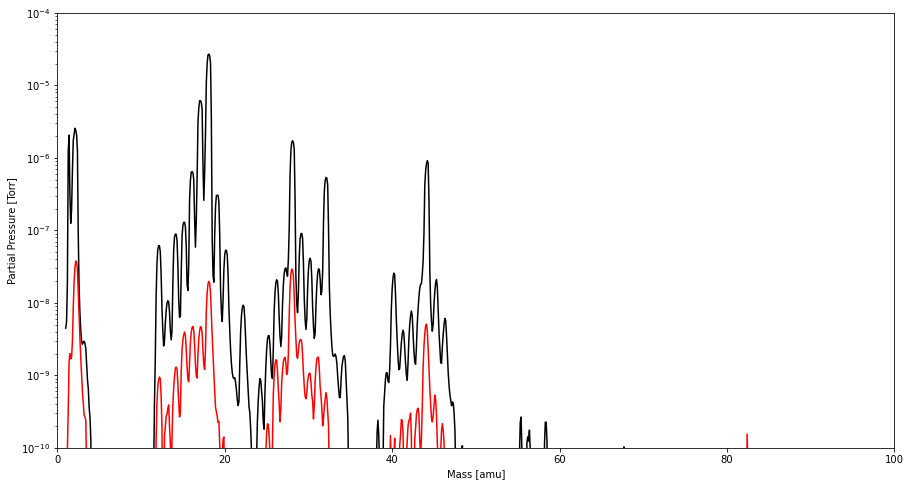

In [10]:
plt.figure(figsize=(15,8))
plt.xlabel('Mass [amu]')
plt.ylabel('Partial Pressure [Torr]')
plt.xlim(0,100)
plt.ylim(1e-10,1e-4)
total_p = []
for x in rga_scans: 
    total_p.append(np.sum(x))
    # plt.plot(amu, x, color='k', lw=1)
plt.plot(amu, rga_scans[0], color='k', alpha=1)
plt.plot(amu, rga_scans[-1], color='r', alpha=1)

plt.yscale('log')
plt.show()

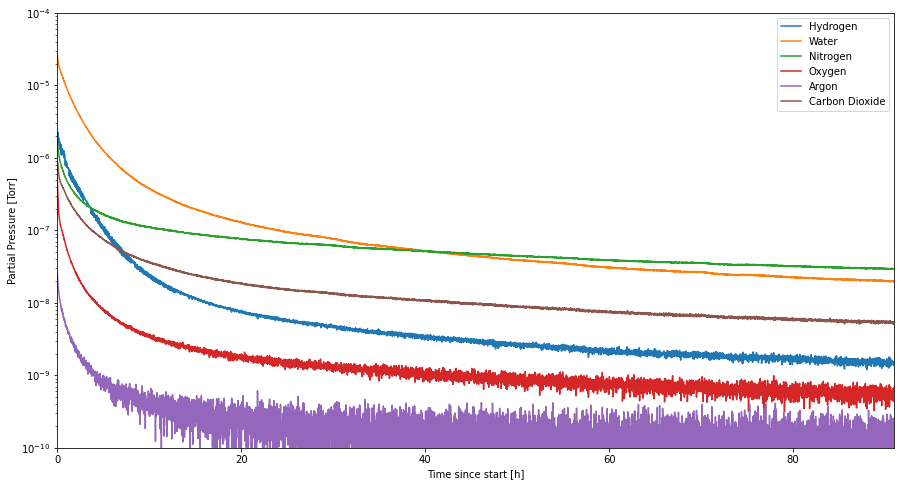

In [27]:
gases = [1,18,28,32,40,44]
labels = ['Hydrogen','Water','Nitrogen','Oxygen','Argon','Carbon Dioxide']

plt.figure(figsize=(15,8))
plt.xlim(0,np.max(delta_t/3600.0))
plt.ylim(1e-10,1e-4)
plt.xlabel('Time since start [h]')
plt.ylabel('Partial Pressure [Torr]')

for i,gas in enumerate(gases):
    cut = np.where((amu<gas+0.5) & (amu>gas-0.5))
    pp = [np.max(x[cut]) for x in rga_scans]
    plt.plot(delta_t/3600.0, pp, label=labels[i])

plt.legend(loc='upper right')
plt.yscale('log')
plt.show()

In [23]:
p_file = 'C:/Users/UsphereLab/Desktop/Outgassing Setup/Scripts/outgassing-setup/Pressure_2021-10-29.h5'
pressure = np.array(pd.read_hdf(p_file, key='ed/ed')).flatten()
pressure_t = np.array(pd.read_hdf(p_file, key='ed/timestamp'))
p_delta_t = [datetime.strptime(x, '%Y%m%d%H%M%S') for x in pressure_t]
p_delta_t = np.array([(x-p_delta_t[0]).total_seconds() for x in p_delta_t])

cut = np.where(pressure!='Err52')
pressure = pressure[cut]
p_delta_t = p_delta_t[cut]
print(pressure)
for x in pressure: 
    try:
        float(x)
    except:
        print(x)
pressure = np.array([float(x) for x in pressure if x])

['6.77E-05' '6.77E-05' '6.74E-05' ... '2.45E-07' '2.45E-07' '2.45E-07']


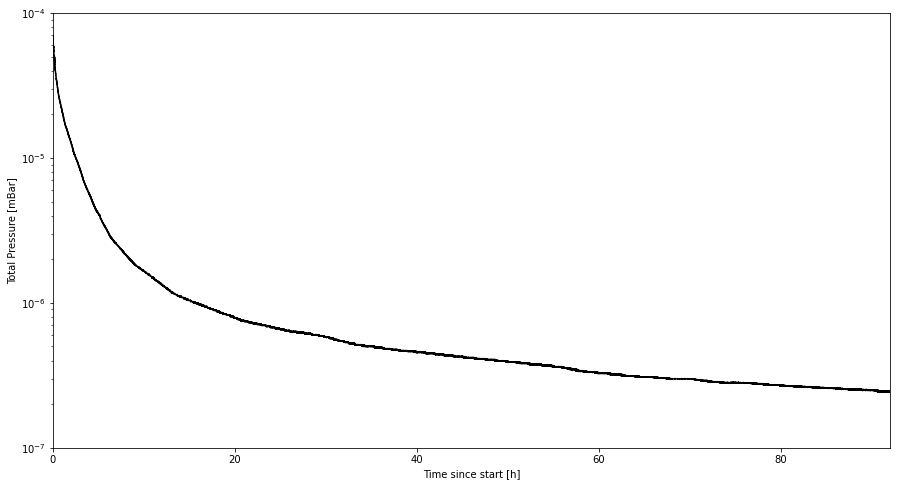

In [26]:
plt.figure(figsize=(15,8))
plt.xlabel('Time since start [h]')
plt.ylabel('Total Pressure [mBar]')
plt.xlim(0, np.max(p_delta_t/3600.0))
plt.ylim(1e-7,1e-4)
plt.yscale('log')
plt.plot(p_delta_t/3600.0, pressure, color='k')
plt.show()

In [29]:
p_file = 'C:/Users/UsphereLab/Desktop/Outgassing Setup/Scripts/outgassing-setup/Thermoprobe_2021-10-29.h5'
temp = np.array(pd.read_hdf(p_file, key='tmd/tmd'))
temp_t = np.array(pd.read_hdf(p_file, key='tmd/timestamp'))
t_delta_t = [datetime.strptime(x, '%Y%m%d%H%M%S') for x in temp_t]
t_delta_t = np.array([(x-t_delta_t[0]).total_seconds() for x in t_delta_t])


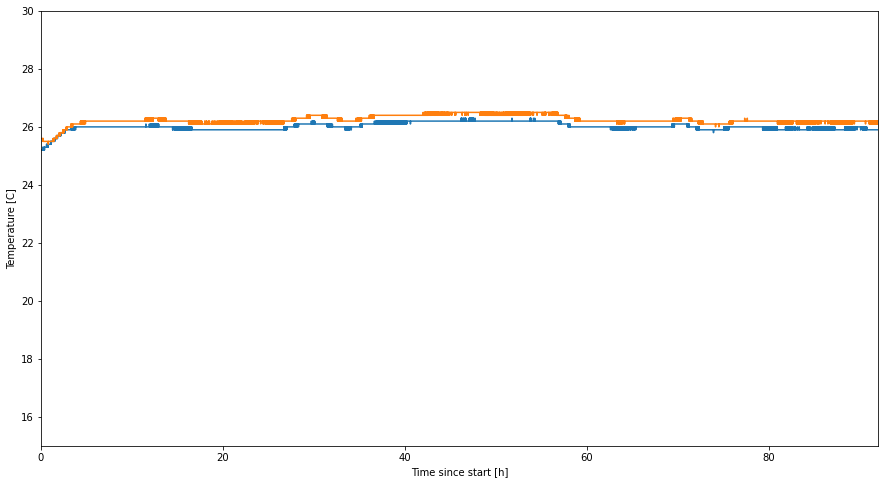

In [30]:
plt.figure(figsize=(15,8))
plt.xlabel('Time since start [h]')
plt.ylabel('Temperature [C]')
plt.xlim(0, np.max(t_delta_t/3600.0))
plt.ylim(15,30)
# plt.yscale('log')
plt.plot(t_delta_t/3600.0, temp[:,0])
plt.plot(t_delta_t/3600.0, temp[:,1])
plt.show()